In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn

# pandas library used here for inspection of dataset

import pandas as pd
# numpy is used here for binning method
import numpy as np
# matplotlib is used to visualize the data
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
#seaborn is also  used for visualize the data
import seaborn as sb
# decision tree and random forest regressor for predicting the output
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve,KFold
from sklearn.preprocessing import MinMaxScaler , Normalizer
from sklearn.metrics import  explained_variance_score, mean_squared_error,mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df=pd.read_csv('Social_Network_Ads.csv')

In [ ]:
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [ ]:
df.shape

(400, 3)

In [ ]:
df.isnull().values.any()

False

In [ ]:
x=df.drop(['Purchased'],axis=1)
y=df.pop("Purchased")

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(x, y, test_size=.30, random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 301,oob_score=True) 
rfcl = rfcl.fit(X_train, train_labels)

In [ ]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

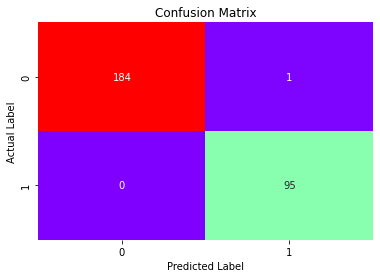

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(train_labels,ytrain_predict)
sns.heatmap(confusion_matrix(train_labels,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       185
           1       0.99      1.00      0.99        95

    accuracy                           1.00       280
   macro avg       0.99      1.00      1.00       280
weighted avg       1.00      1.00      1.00       280



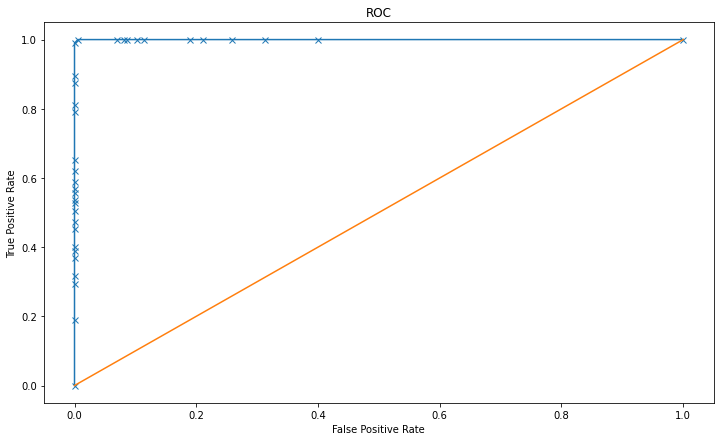

Area under Curve is 0.9999715504978663


In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr, rf_tpr,_=roc_curve(train_labels,rfcl.predict_proba(X_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(train_labels,rfcl.predict_proba(X_train)[:,1]))


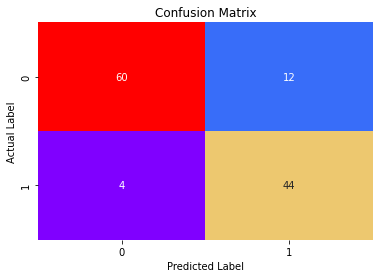

In [ ]:
confusion_matrix(test_labels,ytest_predict)
sns.heatmap(confusion_matrix(test_labels,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
print(classification_report(test_labels,ytest_predict))



              precision    recall  f1-score   support

           0       0.94      0.83      0.88        72
           1       0.79      0.92      0.85        48

    accuracy                           0.87       120
   macro avg       0.86      0.88      0.86       120
weighted avg       0.88      0.87      0.87       120



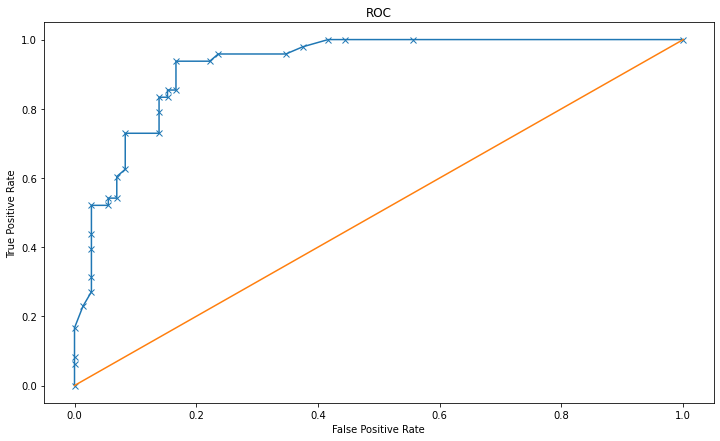

Area under Curve is 0.9239004629629629


In [ ]:


rf_fpr, rf_tpr,_=roc_curve(test_labels,rfcl.predict_proba(X_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(test_labels,rfcl.predict_proba(X_test)[:,1]))

In [59]:
def cross_validation(model,x_train,y_train):
    mae=[]
    mse=[]
    for n in range(1,31):
        pca = PCA(n_components = n)
        pca.fit(x_train)
        x_train_pca = pca.transform(x_train)
        scores = cross_validate(model, x_train_pca,y_train, scoring=("neg_mean_squared_error", "neg_mean_absolute_error"), cv=10)
        mse.append(-scores['test_neg_mean_squared_error'].mean())
        mae.append(-scores['test_neg_mean_absolute_error'].mean())
    d = {'number of components': list(range(1,31)),'mae':mae,'mse':mse}
    # plot mae and mse
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(range(1,31),mae, marker='o')
    ax1.title.set_text('cv-MAE vs number of PCA components')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.plot(range(1,31), mse, marker='o' )
    ax2.title.set_text('cv-MSE vs number of PCA components')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

    return pd.DataFrame(d)
    

In [61]:
pca = PCA(n_components = 1)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [ ]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1] 
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.1)

In [ ]:
pca = PCA(n_components = 0)
pca.fit(x_train)

PCA(n_components=0)

In [62]:
scalerx = MinMaxScaler()
x_train = scalerx.fit_transform(x_train)
x_test = scalerx.transform(x_test)

In [63]:
def cross_validation(model,x_train,y_train):
    mae=[]
    mse=[]
    for n in range(1,31):
        pca = PCA(n_components = n)
        pca.fit(x_train)
        x_train_pca = pca.transform(x_train)
        scores = cross_validate(model, x_train_pca,y_train, scoring=("neg_mean_squared_error", "neg_mean_absolute_error"), cv=10)
        mse.append(-scores['test_neg_mean_squared_error'].mean())
        mae.append(-scores['test_neg_mean_absolute_error'].mean())
    d = {'number of components': list(range(1,31)),'mae':mae,'mse':mse}
    # plot mae and mse
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(range(1,31),mae, marker='o')
    ax1.title.set_text('cv-MAE vs number of PCA components')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.plot(range(1,31), mse, marker='o' )
    ax2.title.set_text('cv-MSE vs number of PCA components')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

    return pd.DataFrame(d)

In [64]:
pca = PCA(n_components = 0)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [66]:
model = RandomForestRegressor()

#candidate values of hyperparameters
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'n_estimators': [100, 300, 500,700]}
grid = GridSearchCV(model, parameters, cv=3, n_jobs=-1)
grid.fit(x_train_pca, y_train.ravel())
print('Best depth:',grid.best_estimator_.max_depth) 
print('Best number of features:',grid.best_estimator_.max_features)
print('Best number of trees:',grid.best_estimator_.n_estimators)

ValueError: ignored

In [65]:
model=RandomForestRegressor(n_estimators=500,bootstrap=True,random_state=21,verbose=0,max_depth=100,max_features=3)
model.fit(x_train_pca,y_train.ravel())
y_pred = model.predict(x_test_pca)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("mae score = ",mae)
print("mse score = ",mse)


ValueError: ignored

In [40]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
def cross_validation(model,x_train,y_train):
    mae=[]
    mse=[]
    for n in range(1,31):
        pca = PCA(n_components = 0)
        pca.fit(x_train)
        x_train_pca = pca.transform(x_train)
        scores = cross_validate(model, x_train_pca,y_train, scoring=("neg_mean_squared_error", "neg_mean_absolute_error"), cv=10)
        mse.append(-scores['test_neg_mean_squared_error'].mean())
        mae.append(-scores['test_neg_mean_absolute_error'].mean())
    d = {'number of components': list(range(1,31)),'mae':mae,'mse':mse}
    # plot mae and mse
    fig, (ax1, ax2) = plt.subplots(2, 1)
    ax1.plot(range(1,31),mae, marker='o')
    ax1.title.set_text('cv-MAE vs number of PCA components')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax2.plot(range(1,31), mse, marker='o' )
    ax2.title.set_text('cv-MSE vs number of PCA components')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))

    return pd.DataFrame(d)
  

,number of components,mae,mse
0,1,NaN,NaN
1,2,NaN,NaN
2,3,NaN,NaN
3,4,NaN,NaN
4,5,NaN,NaN
5,6,NaN,NaN
6,7,NaN,NaN
7,8,NaN,NaN
8,9,NaN,NaN
9,10,NaN,NaN


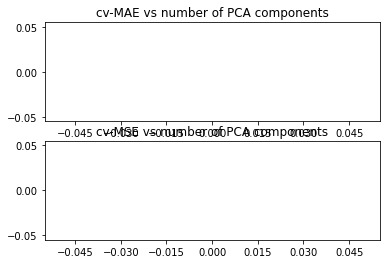

In [56]:
regressor = DecisionTreeRegressor()
cross_validation(regressor,x_train,y_train)

In [68]:
pca = PCA(n_components = 10)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
regressor = DecisionTreeRegressor(random_state=0)
path = regressor.cost_complexity_pruning_path(x_train_pca, y_train)
ccp_alphas=path.ccp_alphas
pd.DataFrame(ccp_alphas).describe()

ValueError: ignored

In [69]:
pca = PCA(n_components = 10)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)
regressor = DecisionTreeRegressor(ccp_alpha=0) 
regressor.fit(x_train_pca,y_train)
#predict the test data
y_pred = regressor.predict(x_test_pca)

ValueError: ignored

In [70]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("mae score = ",mae)
print("mse score = ",mse)

NameError: ignored